In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import os
import random

import statsmodels.api as sm
import statsmodels.stats.multicomp as mc


from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
df = pd.read_csv('merged_stat.csv')


In [39]:
df.describe()

,Unnamed: 0,sentiment1,sentiment2,sentiment_normalised,wordcount,nmf_topics,lda_topics
count,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000
mean,656.000000,25.712110,0.111648,0.019926,565.244478,4.345773,5.484387
std,379.174762,24.646915,0.076778,0.019101,368.656268,2.852980,2.776745
min,0.000000,-87.000000,-0.060815,-0.067423,1.000000,0.000000,0.000000
25%,328.000000,7.000000,0.057943,0.005425,321.000000,2.000000,3.000000
50%,656.000000,24.000000,0.107139,0.018599,526.000000,4.000000,6.000000
75%,984.000000,42.000000,0.160173,0.032549,759.000000,7.000000,7.000000
max,1312.000000,126.000000,0.533333,0.097647,2134.000000,9.000000,9.000000


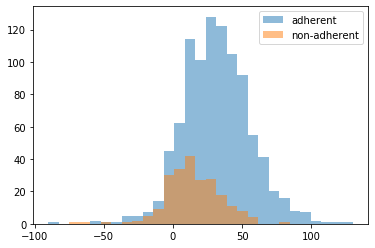

In [19]:
bins= np.linspace(-0.07,0.1,30)
bins2 = np.linspace(-90,130,30)
plt.hist(ad_senti,bins2,alpha=0.5,label='adherent')
plt.hist(nonad_senti,bins2,alpha=0.5,label='non-adherent')
plt.legend()

(array([  1.,   0.,   1.,   1.,   2.,   2.,   1.,   6.,   7.,  12.,  23.,
        194., 102., 162., 130., 156., 140., 116., 100.,  59.,  41.,  20.,
         17.,   8.,   7.,   2.,   1.,   1.,   1.]),
 array([-90.        , -82.4137931 , -74.82758621, -67.24137931,
        -59.65517241, -52.06896552, -44.48275862, -36.89655172,
        -29.31034483, -21.72413793, -14.13793103,  -6.55172414,
          1.03448276,   8.62068966,  16.20689655,  23.79310345,
         31.37931034,  38.96551724,  46.55172414,  54.13793103,
         61.72413793,  69.31034483,  76.89655172,  84.48275862,
         92.06896552,  99.65517241, 107.24137931, 114.82758621,
        122.4137931 , 130.        ]),
 <a list of 29 Patch objects>)

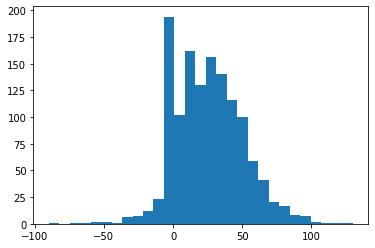

In [14]:
plt.hist(df['sentiment1'],bins2)

In [12]:
np.random.seed(1234)

In [26]:
def anova(data1,data2,n):
    sample1 = random.sample(list(data1),n)
    sample2 = random.sample(list(data2),n)
    F, p = stats.f_oneway(sample1,sample2)
    return F, p

In [3]:
ad_senti= df[df['CurrentStatus']=='Complete']['sentiment1']
ad_senti.count()

957

In [4]:
nonad_senti = df[df['CurrentStatus']=='Ceased']['sentiment1']
nonad_senti.count()

223

In [63]:
anova(ad_senti,nonad_senti,200)

(66.4920767758456, 4.630248907381157e-15)

### There is a significant difference among the groups

In [33]:
comp = mc.MultiComparison(df['sentiment_normalised'],df['CurrentStatus'])

In [34]:
comp.tukeyhsd()

In [36]:
print(comp.tukeyhsd())

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj  lower   upper  reject
-------------------------------------------------------
  Ceased Complete   0.0129 0.001  0.0099   0.016   True
  Ceased Enrolled  -0.0108 0.001 -0.0153 -0.0063   True
Complete Enrolled  -0.0237 0.001 -0.0275   -0.02   True
-------------------------------------------------------


meandiff = group2-group1

### polarity of complete pt is 111.4% higher than that of ceased pt
### polarity of ceased pt is 52.7% lower than that of complete pt

In [29]:
ad_senti.mean()

31.644723092998955

In [33]:
df1= df[df['CurrentStatus']=='Complete']
df1.describe()

,Unnamed: 0,sentiment1,sentiment2,sentiment_normalised,wordcount,nmf_topics,lda_topics
count,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000
mean,579.286311,31.644723,0.125754,0.024524,655.298851,4.631139,5.531870
std,346.987766,24.310819,0.067975,0.018840,335.834912,2.834853,2.762624
min,0.000000,-87.000000,-0.060815,-0.067423,1.000000,0.000000,0.000000
25%,290.000000,15.000000,0.078953,0.011625,426.000000,3.000000,5.000000
50%,568.000000,31.000000,0.121051,0.024024,593.000000,5.000000,6.000000
75%,861.000000,47.000000,0.167062,0.036424,813.000000,7.000000,7.000000
max,1262.000000,126.000000,0.364782,0.097647,2134.000000,9.000000,9.000000


In [40]:
df2= df[df['CurrentStatus']=='Ceased']
df2.describe()


,Unnamed: 0,sentiment1,sentiment2,sentiment_normalised,wordcount,nmf_topics,lda_topics
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,673.134529,14.968610,0.101831,0.011600,500.618834,4.775785,4.260090
std,367.779972,20.101407,0.078157,0.015578,315.486515,2.596593,2.649932
min,4.000000,-74.000000,-0.046936,-0.057348,1.000000,0.000000,0.000000
25%,366.000000,3.000000,0.049766,0.002325,278.000000,3.000000,3.000000
50%,709.000000,15.000000,0.091956,0.011625,443.000000,5.000000,3.000000
75%,973.500000,27.500000,0.144618,0.021312,676.000000,7.000000,6.000000
max,1282.000000,79.000000,0.533333,0.061223,1872.000000,9.000000,9.000000


In [30]:
nonad_senti.mean()

14.968609865470851

In [66]:
meandiff=ad_senti.mean()-nonad_senti.mean()

In [67]:
meandiff/ad_senti.mean()*100

52.697927482315265

### Another method to test anova

In [48]:
mt2 = ols('sentiment_normalised ~ C(CurrentStatus)', data = df).fit()

In [49]:
mt2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     sentiment_normalised   R-squared:                       0.176
Model:                              OLS   Adj. R-squared:                  0.175
Method:                   Least Squares   F-statistic:                     140.1
Date:                  Thu, 25 Mar 2021   Prob (F-statistic):           7.56e-56
Time:                          15:43:26   Log-Likelihood:                 3461.5
No. Observations:                  1313   AIC:                            -6917.
Df Residuals:                      1310   BIC:                            -6902.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.0116      0.001      9.984      0.000       0.009       0.014
C(CurrentStatus)[T.Complete]     0.0129      0.001     10.017      0.000       0.010       0.015
C(CurrentStatus)[T.Enrolled]    -0.0108      0.002     -5.680      0.000      -0.015      -0.007
==============================================================================
Omnibus:                       58.876   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.577
Skew:                          -0.014   Prob(JB):                     1.85e-41
Kurtosis:                       4.851   Cond. No.                         6.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
sm.stats.anova_lm(mt2, typ=2)


,sum_sq,df,F,PR(>F)
C(CurrentStatus),0.084320,2.0,140.053239,7.560200e-56
Residual,0.394347,1310.0,NaN,NaN


same result

----------------


### compare wordcount of different pt

(array([211., 270., 340., 258., 109.,  61.,  36.,  20.,   6.,   2.]),
 array([1.0000e+00, 2.1430e+02, 4.2760e+02, 6.4090e+02, 8.5420e+02,
        1.0675e+03, 1.2808e+03, 1.4941e+03, 1.7074e+03, 1.9207e+03,
        2.1340e+03]),
 <a list of 10 Patch objects>)

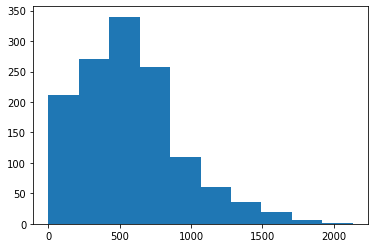

In [55]:
plt.hist(df['wordcount'])

In [22]:
ad_wordcount= df[df['CurrentStatus']=='Complete']['wordcount']
nonad_wordcount = df[df['CurrentStatus']=='Ceased']['wordcount']

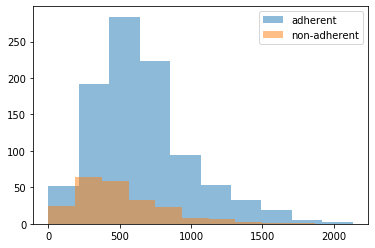

In [26]:
bins= np.linspace(0,2000,50)
plt.hist(ad_wordcount,alpha=0.5,label='adherent')
plt.hist(nonad_wordcount,alpha=0.5,label='non-adherent')
plt.legend()

In [57]:
anova(ad_wordcount,nonad_wordcount,200)

(22.304814327259727, 3.229567895185e-06)

In [58]:
nonad_wordcount.mean()

500.6188340807175

In [59]:
ad_wordcount.mean()

655.2988505747127

In [60]:
155/500

0.31

### wordcount of complete pt is approximately 31% higher than that of ceased pt


In [68]:
df = pd.read_csv('ptnotes_stat.csv')

In [69]:
ad_senti= df[df['CurrentStatus']=='Complete']['sentiment_normalised']
nonad_senti= df[df['CurrentStatus']=='Ceased']['sentiment_normalised']

In [74]:
anova(ad_senti,nonad_senti,2500)

(50.3082016164684, 1.4974861770415457e-12)

In [72]:
ad_senti.mean()

0.00272525624644999

In [73]:
nonad_senti.mean()

0.0014659049298821724

In [75]:
comp = mc.MultiComparison(df['sentiment_normalised'],df['CurrentStatus'])
print(comp.tukeyhsd())

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
  Ceased Complete   0.0013  0.001   0.001  0.0016   True
  Ceased Enrolled  -0.0005 0.6007 -0.0016  0.0007  False
Complete Enrolled  -0.0017 0.0011 -0.0029 -0.0006   True
--------------------------------------------------------


In [78]:
0.0013/nonad_senti.mean()

0.8868242227035094

In [79]:
ad_wordcount= df[df['CurrentStatus']=='Complete']['wordcount']
nonad_wordcount = df[df['CurrentStatus']=='Ceased']['wordcount']

In [83]:
anova(ad_wordcount,ad_wordcount,9500)

(0.04153203521052679, 0.8385165863828802)

### For single piece of ptnotes, no significant difference between the wordcount of two type of pts.